1) Compute tokens, types, and TTR (Just present/print the stats related to each. DO NOT have a statement that prints all thetokens in the pynb.)

In [ ]:
#importing libraries
import pandas as pd
import nltk
nltk.download('punkt')

In [2]:
#getting the data from the csv file
data = pd.read_csv("tweets-dataset.csv")

In [3]:
#tokenizing the sentences
data['tokens'] = data['Sentence'].apply(lambda sentence: nltk.word_tokenize(sentence))
data['# of tokens'] = data['tokens'].apply(lambda tokens: len(tokens))
print('Average tokens per sentence:', data['# of tokens'].mean())

Average tokens per sentence: 16.18310835610293


In [4]:
#typing the sentences
data['types'] = data['tokens'].apply(lambda tokens: set(tokens))
data['# of types'] = data['types'].apply(lambda types: len(types))
print('Average types per sentence:', data['# of types'].mean())

Average types per sentence: 14.472982341666327


In [5]:
#getting ttr for each sentence
data['ttr'] = data['# of types']/data['# of tokens']
print('Average ttr:', data['ttr'].mean())

Average ttr: 0.9160242604696253


In [7]:
#removing symbols and counting tokens for the entire file
import re
Tokens_list = []
tokens_list = [item for sublist in data['tokens'].tolist() for item in sublist]
regex = re.compile(r'\W+')
for i in tokens_list:
    Tokens_list.append(i.lower())
Tokens = [i for i in Tokens_list if not regex.search(i)]
print('total number of tokens:', len(Tokens))

total number of tokens: 306984


In [8]:
#getting types
types = set(Tokens)
print('total number of types:', len(types))

total number of types: 36438


In [9]:
#calculating TTR
ttr = len(types)/len(tokens_list)
print('TTR = ', ttr)

TTR =  0.09182362042809696


In [10]:
#final result printing
print('total number of tokens:', len(Tokens))
print('total number of types:', len(types))
print('TTR = ', ttr)

total number of tokens: 306984
total number of types: 36438
TTR =  0.09182362042809696


2) Check if Zipf’s Law holds true for meanings and length. (You can take some 10-20 random words (for which the meanings exists), get their meanings and work with those.)

In [12]:
#importing Libs
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import wordnet
from collections import Counter

In [13]:
#downloading wordnet
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dhaiwatkabaria/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [20]:
#selecting words and getting meanings
a=[]
counts=Counter(Tokens)
words=['tale','lane','teen','then','wait','can','about','new','good','going','go','better']
data=pd.DataFrame({'Words':words})
data['meanings']=data['Words'].apply(wordnet.synsets)
data['number.meanings']=data['meanings'].apply(len)


In [21]:
for i in words:
    a.append(Counter(tokens_list)[i])
data['word length']=data['Words'].apply(len)
data['frequency']=a

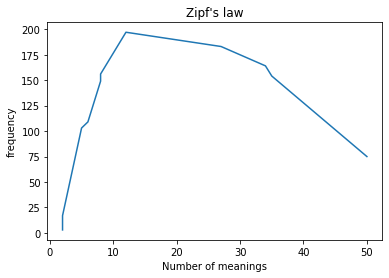

In [24]:
#ploting the graph
plt.plot(data['number.meanings'],data['frequency'])
plt.xlabel('Number of meanings')
plt.ylabel('frequency')
plt.title("Zipf's law")
plt.show()

In [25]:
#to get the list of token frequency
counts_dict = (pd.DataFrame.from_dict(counts, orient='index')).reset_index()
counts_dict['word length']=counts_dict['index'].apply(len)

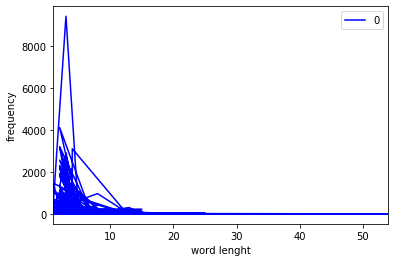

In [26]:
counts_dict.plot(kind='line',x='word length',y=0,color='blue')
plt.xlabel('word lenght')
plt.ylabel('frequency')
plt.show()

3) Plot Heap’s Law.

In [28]:
#get the number of tokens in 50 units at a time
no_types=[]
no_tokens=[]
for i in range(6000):
    total_tokens = Tokens[:i*50]
    no_tokens.append(len(total_tokens))
    no_types.append(len(set(total_tokens)))

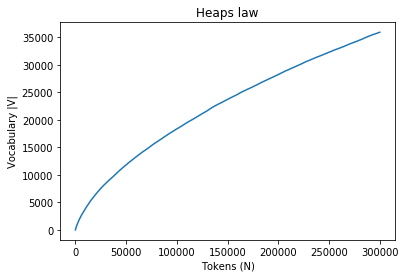

In [29]:
#To plot the data
plt.plot(no_tokens,no_types)
plt.xlabel('Tokens (N)')
plt.ylabel('Vocabulary |V|')
plt.title('Heaps law')
plt.show()

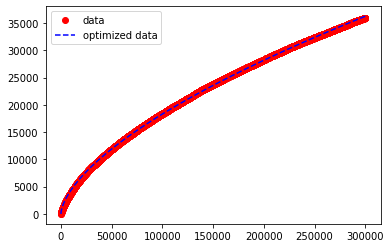

K=14.358851362541303 and b=0.6211436402928001


In [36]:
#param=parameter, param_cov = parameter covarience
V = no_types
N = no_tokens

def heap(N, K, b):
    return K*(N**b)

from scipy.optimize import curve_fit 

param, param_cov = curve_fit(heap, N, V) 

ans = (param[0]*(N**param[1])) 
  
plt.plot(N, V, 'o', color ='red', label ="data") 
plt.plot(N, ans, '--', color ='blue', label ="optimized data") 
plt.legend() 
plt.show() 
print('K='+str(param[0])+' and '+'b='+str(param[1]))